In [1]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Pratikum"

In [4]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Pratikum

/content/drive/My Drive/Pratikum


In [4]:
# Cek apakah api sudah terbaca oleh sistem
!ls

 Accuracy.svg   logs			       'Rice Leaf Disease Model 1.json'
 dataset        model_plot.png		       'Rice Leaf Disease Model 2.h5'
 Dataset        model.tflite		       'Rice Leaf Disease Model 2.json'
 kaggle.json   'Rice Leaf Disease Model 1.h5'   rice_leaf_diseases


In [ ]:
!kaggle datasets download -d vbookshelf/rice-leaf-diseases

100% 36.7M/36.7M [00:00<00:00, 26.1MB/s]



In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rice-leaf-diseases.zip


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
!ls

kaggle.json  rice_leaf_diseases


In [ ]:
!mkdir dataset

In [ ]:
!ls

dataset  kaggle.json  rice_leaf_diseases


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders


base_dir = '/content/drive/MyDrive/Pratikum/rice_leaf_diseases'
data_dir = '/content/drive/My Drive/Pratikum/Dataset'

splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8, .19, .01),group_prefix=None)

In [ ]:
train_dir=os.path.join('/content/drive/My Drive/Pratikum/dataset/train')
test_dir=os.path.join('/content/drive/My Drive/chest_xray/test')
val_dir=os.path.join('/content/drive/My Drive/chest_xray/val')

In [5]:
# TULIS KODE ANDA DISINI
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
input_shape = (224, 224)

train = '/content/drive/MyDrive/Pratikum/dataset/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

validation = '/content/drive/MyDrive/Pratikum/dataset/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

test = '/content/drive/MyDrive/Pratikum/dataset/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 96 images belonging to 3 classes.
Found 21 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, MaxPooling2D, concatenate
from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB5, VGG16
from tensorflow.keras.optimizers import Adam
from keras.layers.merge import concatenate
from keras.layers import Input
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [8]:
from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB5, VGG16

In [10]:
resnet =ResNet50V2 (weights='imagenet', include_top=True)
resnet.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [8]:
from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB5, VGG16
vgg = VGG16(weights='imagenet', include_top=True)
vgg.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(3, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [11]:
# make a reference to VGG's input layer
inp = resnet.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(3, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(resnet.layers[-2].output)

# create a new network between inp and out
model = Model(inp, out)

In [10]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model.layers[-1:]):
    layer.trainable = True

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
def callback(path):
  checkpoint_callback = ModelCheckpoint(path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
  reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000001, verbose=1)
  callbacks_list = [checkpoint_callback, reduce_callback]
  return callbacks_list

In [15]:
best_model_path = 'best_model2.h5'
cb=callback(best_model_path)

In [14]:
best_model_path3 = 'best_model3.h5'
cb3=callback(best_model_path3)

In [13]:
optm = Adam(lr=0.0001)
model_new.compile(loss='categorical_crossentropy', optimizer=optm, 
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history1 = model_new.fit(train_generator, 
                         epochs=100, 
                         validation_data = validation_generator)

Epoch 1/100
3/3 [==============================] - 41s 12s/step - loss: 0.7344 - accuracy: 0.3021 - val_loss: 0.5712 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 24s 8s/step - loss: 0.6596 - accuracy: 0.3958 - val_loss: 0.5762 - val_accuracy: 0.5714
Epoch 3/100
3/3 [==============================] - 27s 10s/step - loss: 0.6141 - accuracy: 0.5208 - val_loss: 0.5635 - val_accuracy: 0.5238
Epoch 4/100
3/3 [==============================] - 39s 14s/step - loss: 0.5543 - accuracy: 0.6042 - val_loss: 0.5461 - val_accuracy: 0.5238
Epoch 5/100
3/3 [==============================] - 30s 10s/step - loss: 0.5060 - accuracy: 0.6771 - val_loss: 0.5376 - val_accuracy: 0.5714
Epoch 6/100
3/3 [==============================] - 38s 14s/step - loss: 0.4687 - accuracy: 0.7500 - val_loss: 0.5317 - val_accuracy: 0.5714
Epoch 7/100
3/3 [==============================] - 41s 14s/step - loss: 0.4357 - accuracy: 0.7917 - val_loss: 0.5232 - val_accuracy: 0.5714
Epoch 8/100
3/3 [====

In [8]:
from keras.applications.vgg19 import VGG19
vgg19_base = VGG19(
    include_top=False,
    input_shape=(224, 224, 3)
    )

for layer in vgg19_base.layers:
    layer.trainable = False

In [22]:
from keras.models import Sequential
model2 = Sequential()

model2.add(vgg19_base)

model2.add(Flatten())

model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(3, activation='softmax'))

In [27]:
optm = Adam(lr=0.0001)
model2.compile(loss='categorical_crossentropy', optimizer=optm, 
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2,
        #    to_file='model_viz.png',
           show_shapes=True,
           show_layer_names=True
           )

In [24]:
history3 = model2.fit(train_generator,
                              epochs = 100,
                              validation_data = (validation_generator),
                              verbose=1, callbacks=[cb])

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 0.9830 - accuracy: 0.4896 
Epoch 00001: val_accuracy did not improve from 0.76190
3/3 [==============================] - 92s 32s/step - loss: 0.9830 - accuracy: 0.4896 - val_loss: 12.0005 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750 
Epoch 00002: val_accuracy did not improve from 0.76190
3/3 [==============================] - 86s 31s/step - loss: 0.3498 - accuracy: 0.8750 - val_loss: 18.1379 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.2068 - accuracy: 0.9583 
Epoch 00003: val_accuracy did not improve from 0.76190
3/3 [==============================] - 79s 28s/step - loss: 0.2068 - accuracy: 0.9583 - val_loss: 20.3966 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.9479 
Epoch 00004: val_accuracy did not

In [19]:
converter_model = tf.lite.TFLiteConverter.from_keras_model(model2) 
tflite_model = converter_model.convert()

with open('model2.tflite', 'wb') as f: 
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpsb5zw5oh/assets


In [ ]:
converter_model = tf.lite.TFLiteConverter.from_keras_model(model_new) 
tflite_model = converter_model.convert()

with open('model.tflite', 'wb') as f: 
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp9xwlon5k/assets


INFO:tensorflow:Assets written to: /tmp/tmp9xwlon5k/assets


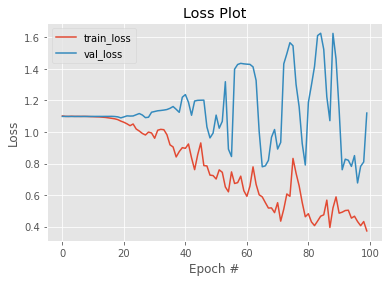

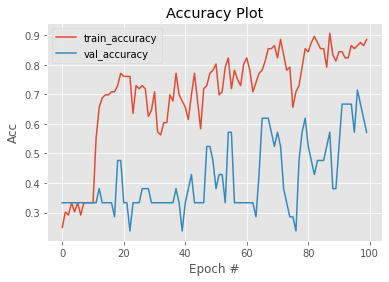

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig =plt.figure()
plt.plot(np.arange(0, 100), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Los.svg'

plt.style.use("ggplot")
fig2=plt.figure()
plt.plot(np.arange(0, 100), history1.history["acc"], label="train_accuracy")
plt.plot(np.arange(0, 100), history1.history["val_acc"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Accuracy.svg'

fig2.savefig(image_name, format=image_format, dpi=1200)

fig.savefig(image_name, format=image_format, dpi=1200)

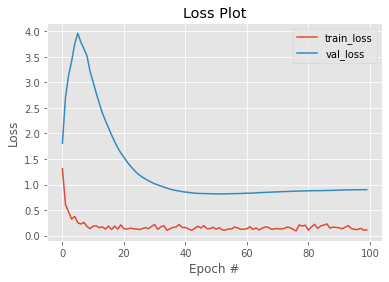

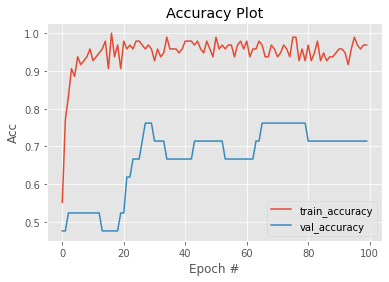

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig3 =plt.figure()
plt.plot(np.arange(0, 100), history3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history3.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Los.svg'

plt.style.use("ggplot")
fig4=plt.figure()
plt.plot(np.arange(0, 100), history3.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 100), history3.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Accuracy.svg'

fig3.savefig(image_name, format=image_format, dpi=1200)

fig4.savefig(image_name, format=image_format, dpi=1200)